# Parameters

In [1]:
from IPython.display import Audio
from helpers.path_utils import get_base_dir
from helpers.transform import TrimAfterTrigger
from helpers.plot import plot_wavelet_spectrogram

base_dir = get_base_dir()
tat = TrimAfterTrigger()

STETHOSCOPE_AUDIO = "test-20240902-1554.wav"
STETHOSCOPE_AUDIO = base_dir.joinpath("data", "digital", STETHOSCOPE_AUDIO)

MOBILE_AUDIO = "test-20240902-1554.wav"
MOBILE_AUDIO = base_dir.joinpath("data", "mobile", MOBILE_AUDIO)

SYNTHETIC_FREQ = 360
DOWNSAMPLE_FACTOR = 400
SIGMA_SMOOTH = 7
PEAKS_HEIGHT = 0.3
PEAKS_PROMINENCE = 0.0001

TRIGGER_DURATION = 0.5
WINDOW = 0.2

# Match records segments
Without the first and last segment

In [2]:
matched_records, sample_rate = tat.sync_records(
    mobile_dir=MOBILE_AUDIO,
    stethos_dir=STETHOSCOPE_AUDIO,
    synthetic_freq=SYNTHETIC_FREQ,
    downsample_factor=DOWNSAMPLE_FACTOR,
    sigma_smooth=SIGMA_SMOOTH,
    peaks_height=PEAKS_HEIGHT,
    peaks_prominence=PEAKS_PROMINENCE,
    trigger_duration=TRIGGER_DURATION,
    window=WINDOW
)

matched_records[0]

(tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0619, -0.0654, -0.0674]),
 tensor([0.0017, 0.0015, 0.0013,  ..., 0.0042, 0.0042, 0.0042]))

# Plot segment

## from mobile

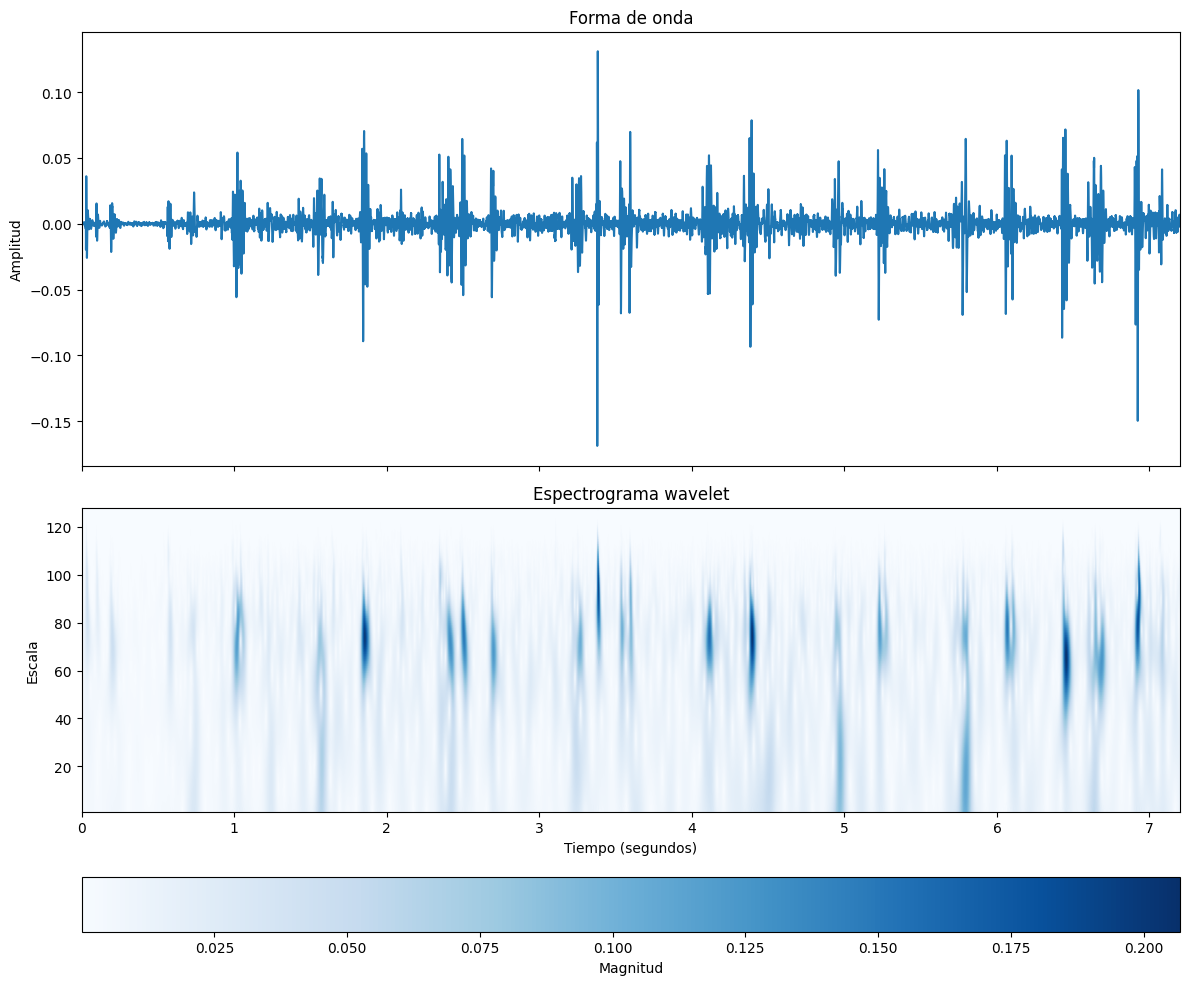

In [3]:
first_mobile_segment = matched_records[2][0]
plot_wavelet_spectrogram(first_mobile_segment, sample_rate, downsample_factor=1)
Audio(first_mobile_segment, rate=sample_rate, autoplay=True)

## from stethoscope

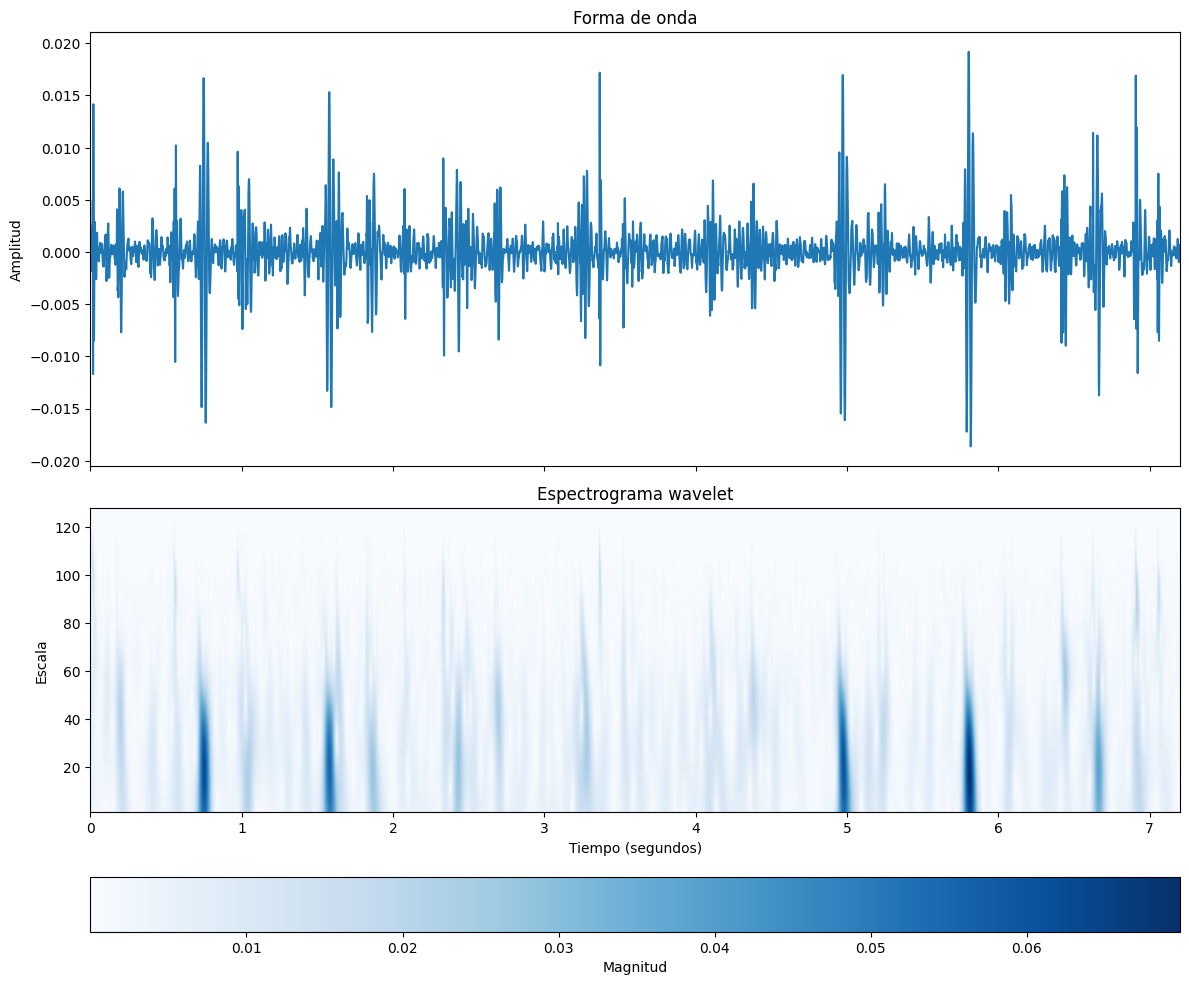

In [4]:
first_stethos_segment = matched_records[2][1]
plot_wavelet_spectrogram(first_stethos_segment, sample_rate, downsample_factor=1)
Audio(first_stethos_segment, rate=sample_rate, autoplay=True)

# Plot trigger

## from mobile

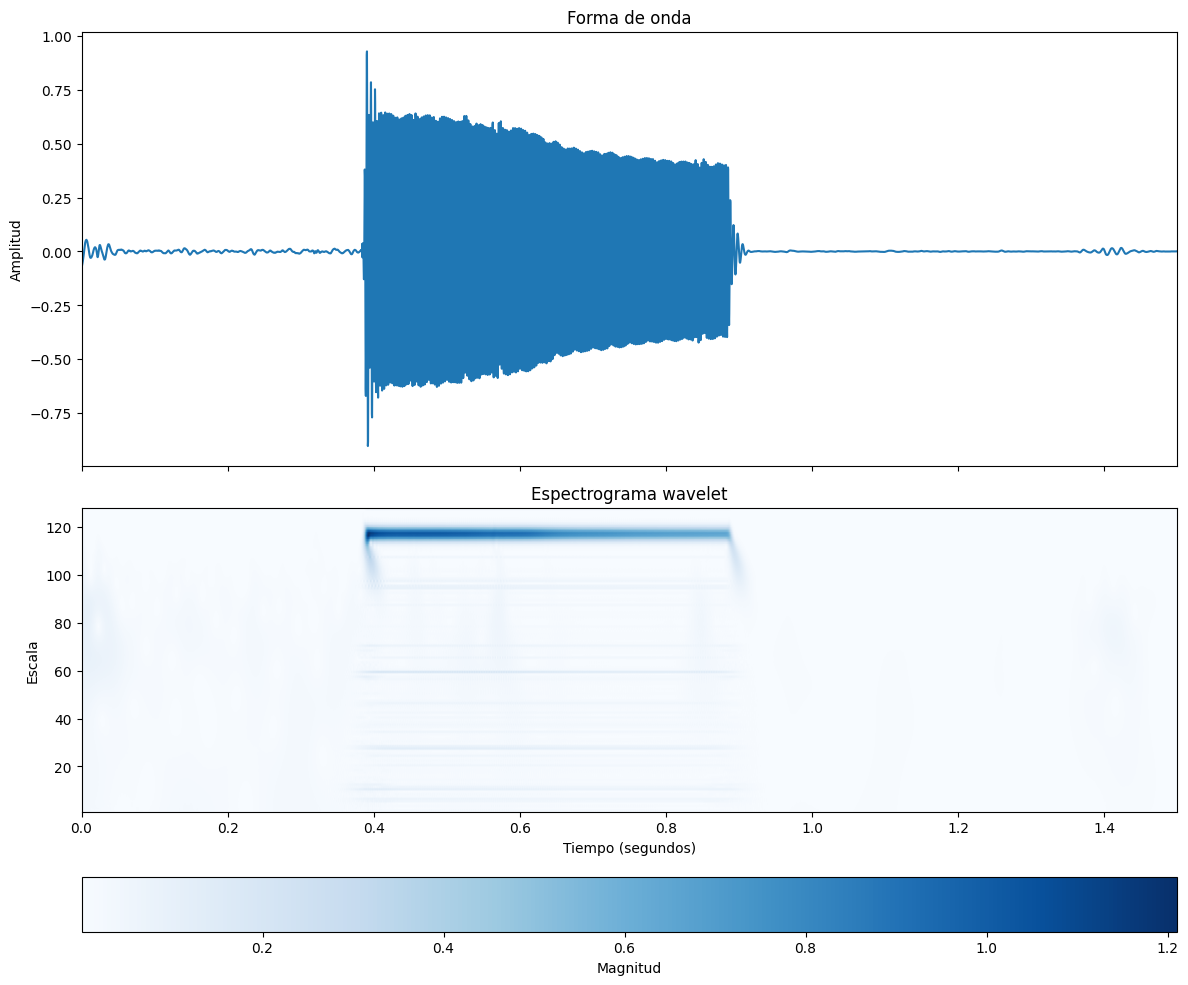

In [5]:
second_mobile_segment = matched_records[1][0]
plot_wavelet_spectrogram(second_mobile_segment, sample_rate, downsample_factor=1)
Audio(second_mobile_segment, rate=sample_rate, autoplay=True)

## from stethoscope

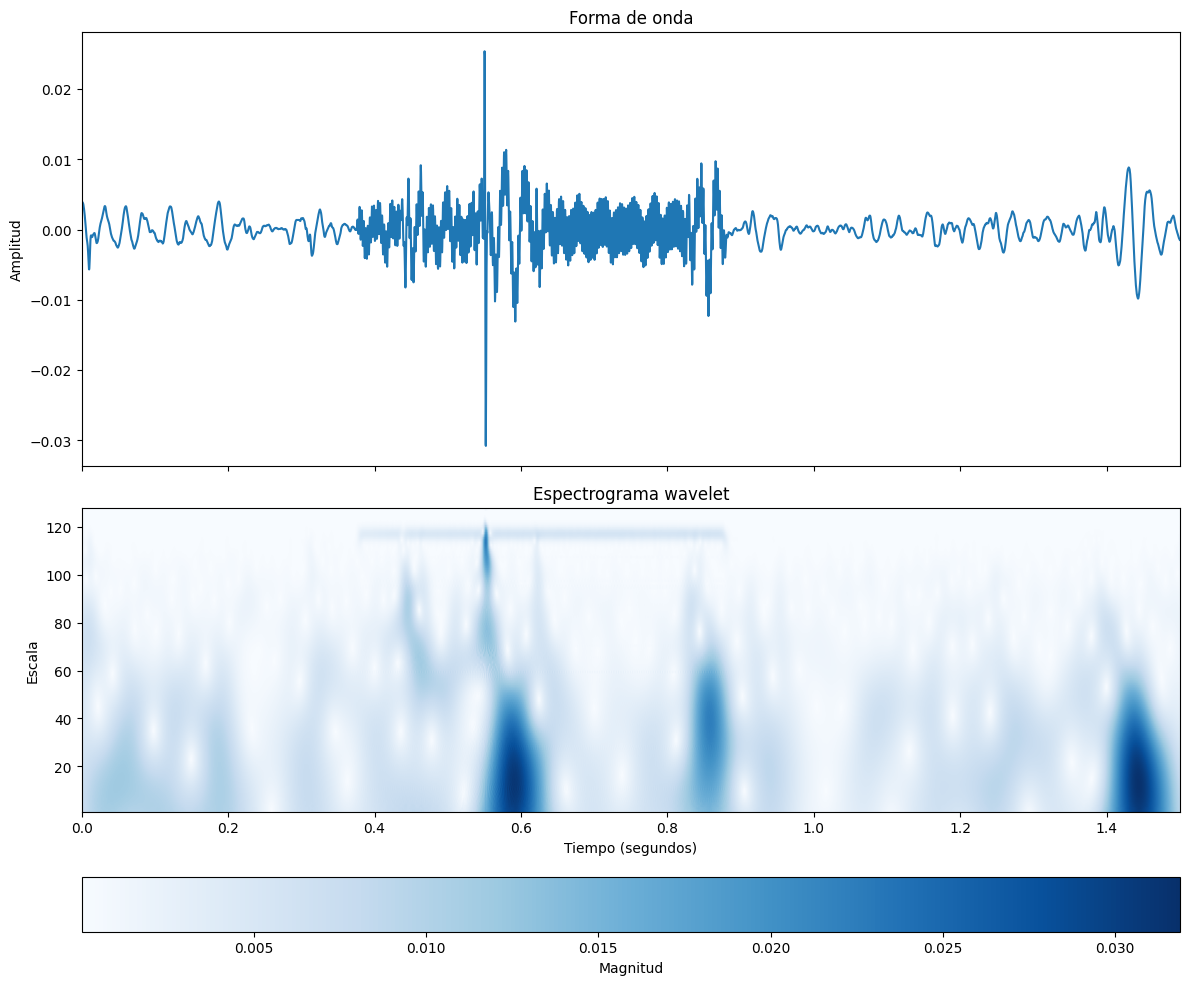

In [6]:
second_stethos_segment = matched_records[1][1]
plot_wavelet_spectrogram(second_stethos_segment, sample_rate, downsample_factor=1)
Audio(second_stethos_segment, rate=sample_rate, autoplay=True)